# [DS 215] Introduction to Data Science - Tutorial

\- TA: Purva Parmar

In this tutorial, we will look at some basic numpy and scikit-learn.

[NumPy](https://numpy.org/) is a library for working with arrays in Python. It provides a lot of convenient and useful functions.

[scikit-learn](https://scikit-learn.org/stable/), also known as sklearn in short, is a Machine Learning library in Python. It provides many kinds of classical ML models and the tooling to work with data for them.

## NumPy

The NumPy website itself has a [User Guide](https://numpy.org/doc/stable/user/index.html), which includes basics as well as tutorials. It is best to look through it, even if just to get to know what is possible with NumPy.

In [1]:
import numpy as np

### Array Basics

In [2]:
# Array Creation and Shape
a = np.array([1, 2, 3])          # 1-D array

b = np.array([[1, 2, 3],         # 2-D array (matrix)
              [4, 5, 6]])

# shape is a tuple of axis lengths. For a 2×3 matrix, shape == (2,3) means 2 rows, 3 columns.
print(f"{a.shape = }")   # (3,)
print(f"{b.shape = }")   # (2, 3)

a.shape = (3,)
b.shape = (2, 3)


In [3]:
# Some useful array creation functions
# Tip: Use dtype= if you need a specific datatype such as float32, int64, etc., like np.array([1,2], dtype=np.float32).

zeros = np.zeros((3,4))         # all zeros, shape (3,4)
ones = np.ones(5)               # 1-D length-5
eye = np.eye(4)                 # identity matrix 4x4
rand = np.random.random((2,3))  # uniform [0,1), shape (2,3)
ar = np.arange(0, 10, 2)        # like range but returns array: [0,2,4,6,8]
lin = np.linspace(0, 1, 5)      # 5 evenly spaced numbers from 0 to 1


print("zeros:\n", zeros)
print()
print("ones:\n", ones)
print()
print("eye:\n", eye)
print()
print("rand:\n", rand)
print()
print("ar:\n", ar)
print()
print("lin:\n", lin)

zeros:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
 [1. 1. 1. 1. 1.]

eye:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

rand:
 [[0.30899976 0.2109134  0.70993151]
 [0.68466582 0.52421386 0.20319497]]

ar:
 [0 2 4 6 8]

lin:
 [0.   0.25 0.5  0.75 1.  ]


### Array Operations

In [4]:
# Array Operations

x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

print("x + y =", x + y)          # 1-D array
b = np.array([[1, 2, 3],         # 2-D array (matrix)
              [4, 5, 6]])
print("x * y =", x * y)   # Element wise multiplication, not matrix multiplication
print("x ** 2 =", x ** 2)
print("Sum of x:", np.sum(x))
print("Mean of y:", np.mean(y))


x + y = [11 22 33]
x * y = [10 40 90]
x ** 2 = [1 4 9]
Sum of x: 6
Mean of y: 20.0


In [5]:
# Matrix Multiplication
# You can use np.matmul or the @ operator
# For dot products, use np.dot (which can also behave as np.matmul in certain cases, read more about it)

A = np.array([[1, 2, 3],
              [4, 5, 6]])   # shape (2, 3)

B = np.array([[10, 20],
              [30, 40],
              [50, 60]])    # shape (3, 2)

# Elementwise multiplication (*) – requires same shape or broadcasting
# Here it will fail, because (2,3) and (3,2) are not broadcast-compatible
try:
    print("\nA * B:\n", A * B)
except ValueError as e:
    print("\nElementwise multiplication failed:", e)

# Matrix multiplication using @ (preferred) or np.matmul
C = A @ B         # shape (2,2) = (2,3) @ (3,2)    , Equivalently np.matmul(A, B)
print("\nMatrix multiplication (A @ B):\n", C)
print(f"{C.shape = }")


Elementwise multiplication failed: operands could not be broadcast together with shapes (2,3) (3,2) 

Matrix multiplication (A @ B):
 [[220 280]
 [490 640]]
C.shape = (2, 2)


In [6]:
# Standard Array Operations
# Element-wise operations operate on arrays of the same shape:
x = np.array([1,2,3])
y = np.array([10,20,30])
print(f"{x + y  = }")        # [11,22,33]
print(f"{x * y  = }")        # [10,40,90]
print(f"{x ** 2 = }")        # [1,4,9]


x + y  = array([11, 22, 33])
x * y  = array([10, 40, 90])
x ** 2 = array([1, 4, 9])


In [7]:
# Common Reductions

print(f"{x = }")
print(f"{y = }\n")
print(f"{np.sum(x) = }")
print(f"{np.mean(y) = }")
print(f"{np.max(x) = }")
print(f"{np.min(x) = }")
print(f"{np.std(y) = }")
print(f"{np.prod([2,3,4]) = }")    # Product of the elements in the array

x = array([1, 2, 3])
y = array([10, 20, 30])

np.sum(x) = 6
np.mean(y) = 20.0
np.max(x) = 3
np.min(x) = 1
np.std(y) = 8.16496580927726
np.prod([2,3,4]) = 24


### Array Axes

In NumPy dimensions are called **axes**.

For example, the array for the coordinates of a point in 3D space, `[1, 2, 1]`, has one axis. That axis has 3 elements in it, so we say it has a length of 3. 

Now consider 

```
[[1., 0., 0.],
 [0., 1., 2.]]
```
This array has 2 axes and shape (2, 3). The first/innermost axis (axis=0) has a length of 2, the second axis (axis=1) has a length of 3.

In [8]:
# You can do operations along an axis:
M = np.array([[1,2,3],[4,5,6]])  # shape (2,3)

print("M:\n", M)

print(f"{np.sum(M, axis=0) = }")  # sum columns -> array([5,7,9])  shape (3,)
print(f"{np.sum(M, axis=1) = }")  # sum rows    -> array([6,15])  shape (2,)


M:
 [[1 2 3]
 [4 5 6]]
np.sum(M, axis=0) = array([5, 7, 9])
np.sum(M, axis=1) = array([ 6, 15])


### Array Broadcasting

This is a important concepts, and I suggest you take out some time to read more about specifically about this. Use any resources you can find, even consult with your LLM advisors.

Intuition: broadcasting expands smaller arrays to match larger shapes during arithmetic without copying data. Rules are simple:

- If arrays have different ranks, prepend 1s to the smaller array's shape until ranks match.
- For each axis (from trailing / rightmost to leftmost), the dimensions must either be equal, or one of them must be 1.
- If one is 1, that array is virtually repeated along that axis.

In [9]:
# Array Broadcasting

matrix = np.array([[1, 2, 3], [4, 5, 6]])
vector = np.array([10, 20, 30])

print(f"{matrix}")
print(f"{matrix.shape = }\n")

print(f"{vector}")
print(f"{vector.shape = }")

print("\nAdding them (Note that the rightmost dimensions match)")
print(matrix + vector)
print(f"{(matrix + vector).shape = }")

# In the above example, the vector is broadcasted, and becomes:
# [[10, 20, 30],
#  [10, 20, 30]]
# when expanded, and the element-wise sum goes through like
#
# [[10, 20, 30],     +    [[1, 2, 3],      =      [[11, 22, 33],
#  [10, 20, 30]]           [4, 5, 6]]              [14, 25, 36]]

[[1 2 3]
 [4 5 6]]
matrix.shape = (2, 3)

[10 20 30]
vector.shape = (3,)

Adding them (Note that the rightmost dimensions match)
[[11 22 33]
 [14 25 36]]
(matrix + vector).shape = (2, 3)


### Array Reshaping

You can reshape arrays into different kinds of dimensions, assuming they are compatible.

When you use `-1` in reshape, it means "infer this dimension". NumPy computes it for you so that total number of elements remains constant.

In [10]:
arr = np.arange(6)            # [0,1,2,3,4,5]
arr2 = arr.reshape((2,3))     # shape (2,3), Equivalent to arr.reshape(-1, 3) or arr.reshape(2, -1)
# [[0,1,2],
#  [3,4,5]]

print("arr:\n", arr)

print("\nReshaped Arr (arr2):\n", arr2)

# You can add new axes too (can also do via reshaping)
arr_row = arr[np.newaxis, :]    # shape (1,6)   - Equivalent to arr.reshape(1, -1) or arr.reshape(1, 6)
arr_col = arr[:, np.newaxis]    # shape (6,1)   - Equivalent to arr.reshape(-1, 1) or arr.reshape(6, 1)

print("\narr_row:\n", arr_row)
print(f"{arr_row.shape = }")
print("\narr_col:\n", arr_col)
print(f"{arr_col.shape = }")

arr:
 [0 1 2 3 4 5]

Reshaped Arr (arr2):
 [[0 1 2]
 [3 4 5]]

arr_row:
 [[0 1 2 3 4 5]]
arr_row.shape = (1, 6)

arr_col:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
arr_col.shape = (6, 1)


### NumPy Linear Algebra

Some Linear Algebra functions are available in `np.linalg` module.

In [11]:
v = np.array([3, 4])
print("v:", v)

# Default: L2 (Euclidean) norm = sqrt(3^2 + 4^2) = 5
norm_v = np.linalg.norm(v)
print("\nL2 norm of v:", norm_v)

# L1 norm (sum of absolute values)
norm_v1 = np.linalg.norm(v, ord=1)
print("L1 norm of v:", norm_v1)

# You can also compute norms of matrices
A = np.array([[1, 2],
              [3, 4]])
print("\nMatrix A:\n", A)

# Frobenius norm (default for 2D): sqrt(sum(A^2))
norm_A = np.linalg.norm(A)
print("\nFrobenius norm of A:", norm_A)


v: [3 4]

L2 norm of v: 5.0
L1 norm of v: 7.0

Matrix A:
 [[1 2]
 [3 4]]

Frobenius norm of A: 5.477225575051661


It is recommended to go through the [NumPy Quickstart Guide](https://numpy.org/doc/stable/user/quickstart.html) on the library's documentation page. There are more things like Indexing, Slicing, Views and Copies, and other tricks and tips there that we haven't covered here.

There are a lot of useful numpy functions. You do not need to know how to use everything, but you should know what all kinds of functions exist. And so, I would recommend going through the documentation once to see the list of functions and reading briefly what they do. So that you can look up the documentation in detail when you really need it.

## scikit-learn

The [scikit-learn website](https://scikit-learn.org/stable/) has really good examples and a good user guide. Refer to it when needed.

sklearn can feel complicated when looking at it for the first time, but there are many common patterns.

- **Data Split**: The `sklearn.model_selection.train_test_split` is a convenient function to split data into train and test splits.
- **Data Processing and Transforms**
    - You can use `sklearn.preprocessing` module's `StandardScaler`, `Normalizer` and more.
    - Their `.fit()` method learns the transformation from the training data. You can them use `.transform()` to actually do the transform.
    - You can do both the above in one step like `.fit_transform(X_train)` to learn the parameters of the transformers from X_train and apply them to X_train
    - You can then apply the learned transformation to X_test, for example, with `.transform(X_test)` (Do not learn a new transform with .fit() for X_test, that would mean we are leaking test data in our training)
- **ML Models**: LogisticRegression, RandomForestClassifier, LinearRegression, etc.
    - All of these have a `.fit(X_train, y_train)` function as well, to learn the model with the dataset
    - You can get predictions with `.predict(X_test)`
    - Some models also have a `.predict_proba(X_test)` for returning class probabilities
- **Metrics**: `sklearn.metrics` provides useful functions for computing evaluation metrics easily.

---

### Logistic Regression in Python

Logistic Regression is a **supervised learning** algorithm used for **classification** problems.
Despite its name, it is **not used for regression** — instead, it models the **probability** of an instance belonging to a class.

It’s one of the simplest and most interpretable models in machine learning, often used as a **baseline classifier**.


**Key Idea**

We want to predict the probability that a sample $x$ belongs to class $1$:

$$
P(y=1 \mid x) = \sigma(w^T x + b)
$$

where:

- $w$ = weight vector (learned from data)
- $b$ = bias term
- $\sigma(z)$ = **sigmoid function**, which maps real numbers to [0, 1]

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

**Decision Rule**

If the predicted probability ≥ 0.5, classify as class **1**, else class **0**.

$$
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(w^T x + b) \ge 0.5 \\
0 & \text{otherwise}
\end{cases}
$$


---

**Loss Function**

The model is trained by minimizing the **log-loss** (also called **binary cross-entropy loss**):

$$
\mathcal{L}(w, b) = -\frac{1}{N} \sum_{i=1}^{N} \left[
y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)
\right]
$$

This encourages:

- $\hat{y}_i \to 1$ when $y_i = 1$
- $\hat{y}_i \to 0$ when $y_i = 0$


X.shape = (200, 2)
y.shape = (200,)


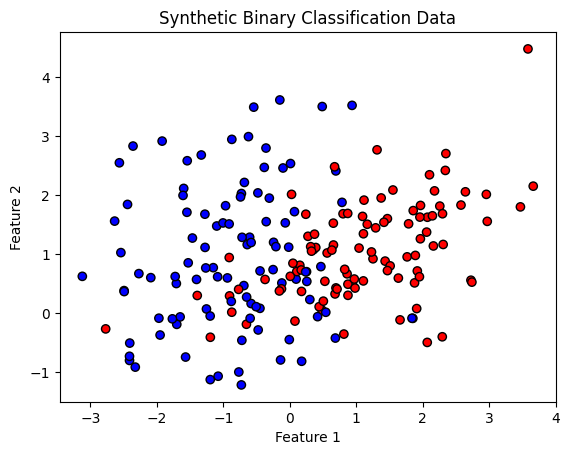

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate 2D dataset with 2 classes
# Documentation for this function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

print(f"{X.shape = }")   # (200, 2)
print(f"{y.shape = }")   # (200,)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
log_reg = LogisticRegression()

# Train (fit) the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

print("Predicted labels:", y_pred[:10])
print("True labels:     ", y_test[:10])

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Predicted labels: [0 1 1 1 1 1 0 0 0 0]
True labels:      [0 0 0 1 1 1 0 0 0 0]

Accuracy: 0.88

Confusion Matrix:
 [[18  5]
 [ 0 17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.77      1.00      0.87        17

    accuracy                           0.88        40
   macro avg       0.89      0.89      0.87        40
weighted avg       0.90      0.88      0.88        40



### K-Means Clustering

K-Means is an **unsupervised learning** algorithm used for **clustering** — grouping data points into $K$ clusters based on similarity.

It tries to minimize the **distance** between points in a cluster and their assigned **centroid** (mean point).

---

**Algorithm Steps**

1. **Initialization:**
   Randomly choose $K$ initial centroids $\mu_1, \mu_2, \dots, \mu_K$.

2. **Assignment Step:**
   Assign each data point to the **nearest centroid**:

3. **Update Step:**
   Recompute each centroid as the **mean of its assigned points**:

   $$
   \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
   $$

4. **Repeat:**
   Until centroids stop moving (convergence) or a max iteration limit is reached.

**Convergence**

K-Means is guaranteed to converge, but it may converge to a **local minimum**, so it’s common to run it multiple times with different random initializations (`n_init` parameter in scikit-learn).

**Limitations of K-Means**

- Sensitive to initial centroids
- Works best with spherical (isotropic) clusters
- Requires specifying $K$ in advance
- Affected by outliers (they can pull centroids)

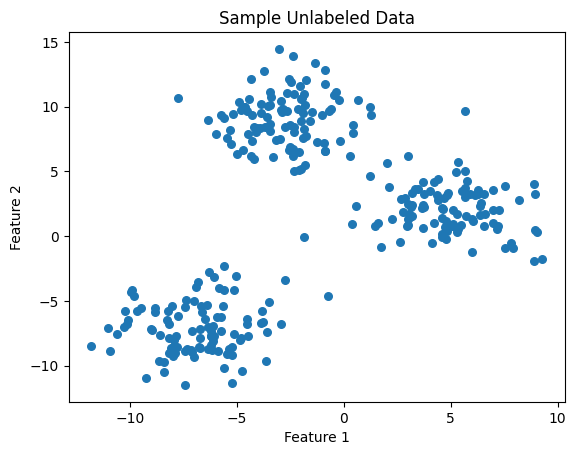

In [14]:
from sklearn.datasets import make_blobs

# 3 clusters of 2D points
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Sample Unlabeled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [15]:
from sklearn.cluster import KMeans

# Initialize and fit model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Cluster assignments
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f"{centroids.shape = }")  # (3, 2)
print("\nCluster centers:\n", centroids)
print("\nFirst 10 labels:", labels[:10])


centroids.shape = (3, 2)

Cluster centers:
 [[-2.75726773  9.07285344]
 [-6.88811639 -7.0878587 ]
 [ 4.85432791  2.04801886]]

First 10 labels: [1 1 0 2 1 2 0 2 0 0]


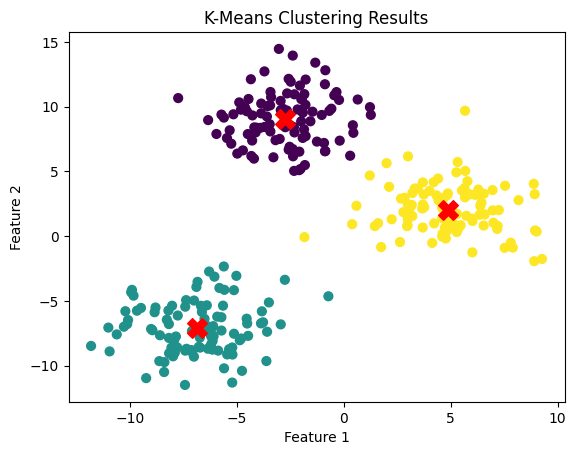

In [16]:
# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### The Elbow Method

The Elbow Method is a method for choosing the number of centroids we want, i.e. $K$.

We run K-Means for different values of $K$ and plot the **inertia** (Inertia = Sum of squared distances of samples to their nearest cluster center):

$$
\text{Inertia}(K) = \sum_{k=1}^{K} \sum_{x_i \in C_k} || x_i - \mu_k ||^2
$$

Then, look for the **"elbow point"**, the point where the decrease in inertia slows down sharply.
That point often indicates a good tradeoff between model simplicity and accuracy.

There are also other measures like Silhouette Score, Davies–Bouldin Index, Gap Statistic, Information Criteria (BIC / AIC), etc. You can read more about them from your favourite LLM if interested, and/or if you find yourself in a position where you have to decide the number of clusters in a clustering task.

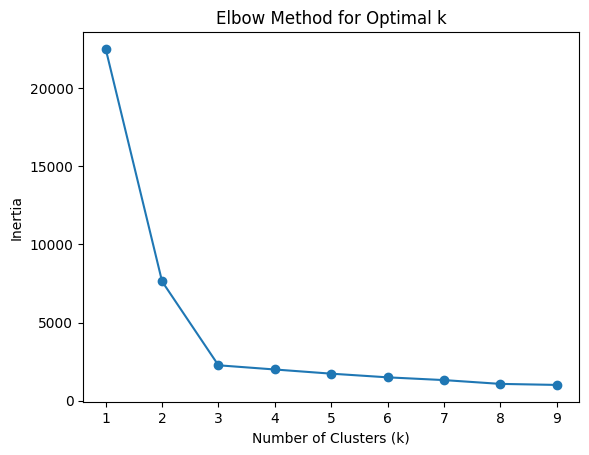

In [17]:
inertias = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

As you can see above, the sharp decrease stops at roughly K=3. Sometimes you can decide the number of clusters simply by visualizing the data itself, but that may not be feasible when the data itself is high-dimensional.

---

That was all for a basic scikit-learn tutorial too. You can look at the [Examples](https://scikit-learn.org/stable/auto_examples/index.html) page to learn more about different kinds of models and how to use them with scikit-learn.